In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices("GPU")
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    # Invalid device or cannot modify virtual devices once initialized.
    pass

# Transfer learning 101

In this notebook we will be using the food 101 dataset: https://www.kaggle.com/kmader/food41
We will just load the data in and resize it to 128x128 without looking to much into pre-processing or hyper parameter tuning given it is outside the scope of this session.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(validation_split=0.3)
train_generator = data_generator.flow_from_directory(r"D:\data\food", target_size=(128, 128), batch_size=64, subset="training")
validation_generator = data_generator.flow_from_directory(r"D:\data\food", target_size=(128, 128), batch_size=64, subset="validation")

Found 70700 images belonging to 101 classes.
Found 30300 images belonging to 101 classes.


## Let's have a look at the data we are dealing with

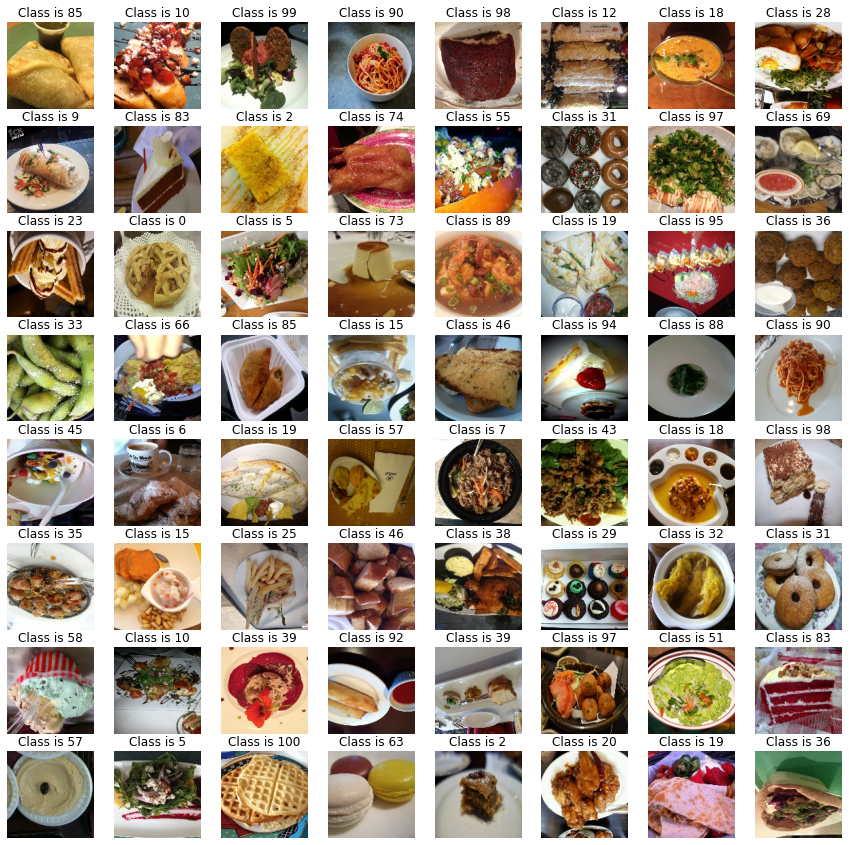

In [3]:
import matplotlib.pyplot as plt
import numpy as np
X, Y = train_generator.__getitem__(0)

fig, axes = plt.subplots(8, 8,figsize=(15,15))
for x in range(8):
    for y in range(8):
        axes[x][y].imshow(X[x*8 + y].astype("uint8"))
        axes[x][y].title.set_text(f"Class is {np.argmax(Y[x*8 + y])}")
        axes[x][y].axis('off')

plt.show()

## Getting the model
We will download the [EfficientNet B0](https://arxiv.org/abs/1905.11946). This is a network optimized to have as little FLOPS for the maximum accuracy. The network can be downloaded with and without pre-trained weights. The pre-trained weights are trained on the [imageNet Challange](http://image-net.org/). These are nature image made with normale camera's of everyday objects (not just food).

In this notebook we are gone to see what a difference it makes to have 

In [6]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.layers import AveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model

def create_model(weights="imagenet", n_classes=101):
    pre_trained_model = EfficientNetB0(include_top=False, weights=weights)

    input_layer = pre_trained_model.input
    average_pool = AveragePooling2D((4, 4))(pre_trained_model.output)

    dense1 = Dense(256)(average_pool)
    dense2 = Dense(n_classes, activation="softmax")(dense1)
    flat = Flatten()(dense2)

    model = Model(input_layer, flat)

    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy']
    )
    return model

In [7]:
model_no_pretrain = create_model(None)
history = model_no_pretrain.fit(train_generator,
            validation_data=validation_generator,
            epochs=10)

Epoch 1/10
1105/1105 [==============================] - 1387s 1s/step - loss: 4.6257 - accuracy: 0.0344 - val_loss: 5.0037 - val_accuracy: 0.0356
Epoch 2/10
1105/1105 [==============================] - 1112s 1s/step - loss: 4.3237 - accuracy: 0.0713 - val_loss: 4.1588 - val_accuracy: 0.0751
Epoch 3/10
1105/1105 [==============================] - 1158s 1s/step - loss: 4.1067 - accuracy: 0.1056 - val_loss: 14.5101 - val_accuracy: 0.0176
Epoch 4/10
1105/1105 [==============================] - 877s 794ms/step - loss: 4.1502 - accuracy: 0.1016 - val_loss: 4.1430 - val_accuracy: 0.1132
Epoch 5/10
1105/1105 [==============================] - 1057s 957ms/step - loss: 4.1952 - accuracy: 0.0954 - val_loss: 5.0090 - val_accuracy: 0.0688
Epoch 6/10
1105/1105 [==============================] - 1036s 938ms/step - loss: 4.1643 - accuracy: 0.0994 - val_loss: 4.1395 - val_accuracy: 0.1040
Epoch 7/10
1105/1105 [==============================] - 784s 710ms/step - loss: 4.0842 - accuracy: 0.1124 - val_los

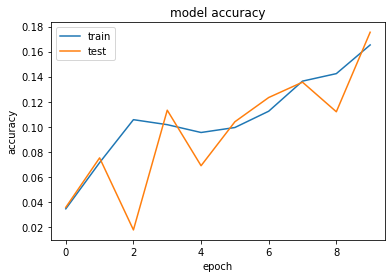

In [8]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

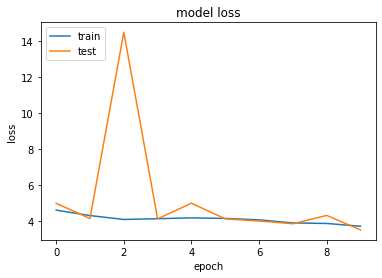

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model_with_pretrain = create_model("imagenet")
history = model_with_pretrain.fit(train_generator,
            validation_data=validation_generator,
            epochs=10)

Epoch 1/10
1105/1105 [==============================] - 355s 322ms/step - loss: 2.0703 - accuracy: 0.4814 - val_loss: 1.6534 - val_accuracy: 0.5801
Epoch 2/10
1105/1105 [==============================] - 353s 320ms/step - loss: 1.4132 - accuracy: 0.6280 - val_loss: 1.5239 - val_accuracy: 0.6176
Epoch 3/10
1105/1105 [==============================] - 519s 470ms/step - loss: 1.1909 - accuracy: 0.6778 - val_loss: 1.5636 - val_accuracy: 0.6050
Epoch 4/10
1105/1105 [==============================] - 480s 435ms/step - loss: 1.0371 - accuracy: 0.7158 - val_loss: 1.4453 - val_accuracy: 0.6380
Epoch 5/10
1105/1105 [==============================] - 375s 340ms/step - loss: 0.9189 - accuracy: 0.7455 - val_loss: 1.4820 - val_accuracy: 0.6401
Epoch 6/10
1105/1105 [==============================] - 514s 465ms/step - loss: 0.8166 - accuracy: 0.7690 - val_loss: 1.5739 - val_accuracy: 0.6277
Epoch 7/10
1105/1105 [==============================] - 383s 347ms/step - loss: 0.7281 - accuracy: 0.7916 - val_

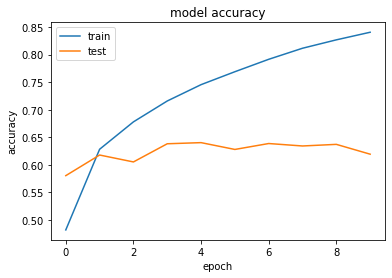

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

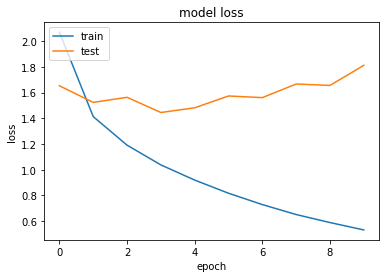

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()